In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
state_abbreviations = {"Alabama": "AL",
                       "Alaska": "AK",
                       "Arizona": "AZ",
                       "Arkansas": "AR",
                       "California": "CA",
                       "Colorado":"CO",
                       "Connecticut": "CT",
                       "Delaware": "DE",
                       "District of Columbia": "DC",
                       "Florida": "FL",
                       "Georgia": "GA",
                       "Hawaii": "HI",
                       "Idaho": "ID",
                       "Illinois": "IL", 
                       "Indiana": "IN",
                       "Iowa": "IA",
                       "Kansas": "KS",
                       "Kentucky": "KY",
                       "Louisiana": "LA",
                       "Maine": "ME",
                       "Maryland": "MD",
                       "Massachusetts":"MA",
                       "Michigan": "MI",
                       "Minnesota": "MN",
                       "Mississippi": "MS",
                       "Missouri": "MO",
                       "Montana": "MT",
                       "Nebraska": "NE",
                       "Nevada": "NV",
                       "New Hampshire": "NH",
                       "New Jersey": "NJ",
                       "New Mexico": "NM", 
                       "New York": "NY",
                       "North Carolina": "NC",
                       "North Dakota": "ND",
                       "Ohio": "OH",
                       "Oklahoma": "OK",
                       "Oregon": "OR",
                       "Pennsylvania": "PA",
                       "Rhode Island": "RI",
                       "South Carolina": "SC",
                       "South Dakota": "SD",
                       "Tennessee": "TN",
                       "Texas": "TX",
                       "Utah": "UT",
                       "Vermont": "VT",
                       "Virginia": "VA",
                       "Washington": "WA",
                       "West Virginia": "WV",
                       "Wisconsin": "WI",
                       "Wyoming": "WY",
         }

In [16]:
# Reading median unemployment csv file
med_unemployment_csv = 'Data/Median_Unemployment_Rates_per_Year.csv'
unemployment_df = pd.read_csv(med_unemployment_csv)
unemployment_df.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Median
0,2004,5.65,7.45,4.95,5.55,6.25,5.50,5.1,4.30,8.20,...,5.30,5.95,5.05,3.65,4.1,6.25,5.70,4.95,3.80,5.30
1,2005,4.35,6.95,4.70,5.25,5.30,5.05,4.8,4.50,6.85,...,5.40,5.40,4.05,3.45,3.9,5.60,5.40,4.70,3.55,4.90
2,2006,4.00,6.65,4.40,5.30,4.90,4.35,4.4,3.95,6.35,...,5.40,5.15,2.85,3.75,3.3,5.00,5.20,4.70,3.00,4.50
3,2007,4.00,6.30,3.75,5.40,5.25,3.65,4.4,3.60,5.90,...,4.55,4.40,2.55,3.90,3.2,4.60,4.80,4.80,2.70,4.45
4,2008,5.75,6.50,5.70,5.20,7.15,4.75,5.6,4.85,6.70,...,6.50,4.75,3.20,4.55,4.2,5.25,4.55,4.65,2.85,5.25


In [17]:
# Reading homeownership csv file
homeownership_csv = '../Data/Homeownership_Rate.csv'
homeownership_df = pd.read_csv(homeownership_csv)
homeownership_df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,69.0,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,...,68.5,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8
1,2005-01-01,68.9,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,...,68.4,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8
2,2006-01-01,68.8,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,...,70.6,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7
3,2007-01-01,68.1,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,...,70.4,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2
4,2008-01-01,67.8,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,...,70.4,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3


In [18]:
homeownership_df['Year'] = homeownership_df['Date'].str.split('-', expand=True)[0]
homeownership_df.drop(columns=['Date', 'United States'], inplace= True)
homeownership_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,45.6,72.2,...,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8,2004
1,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,45.8,72.4,...,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8,2005
2,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,45.9,72.4,...,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7,2006
3,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,47.2,71.8,...,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2,2007
4,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,44.1,71.1,...,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3,2008


In [19]:
median_homeowner_grp = homeownership_df.groupby('Year').median()
median_homeowner_grp.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2004,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,45.6,72.2,...,68.5,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8
2005,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,45.8,72.4,...,68.4,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8
2006,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,45.9,72.4,...,70.6,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7
2007,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,47.2,71.8,...,70.4,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2
2008,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,44.1,71.1,...,70.4,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3


In [21]:
states = unemployment_df.columns.unique()
states = states.drop(['Year', 'Median'])
data = pd.DataFrame({'State': state_abbreviations,
                     'Median Unemployment Rate': unemployment_df[states].median(),
                     'Median Homeownership Rate': median_homeowner_grp[states].median()})
data.set_index('State', inplace=False)
data.head()

,State,Median Unemployment Rate,Median Homeownership Rate
Alabama,AL,5.55,72.95
Alaska,AK,6.60,65.00
Arizona,AZ,5.15,66.30
Arkansas,AR,5.25,67.35
California,CA,6.25,55.30


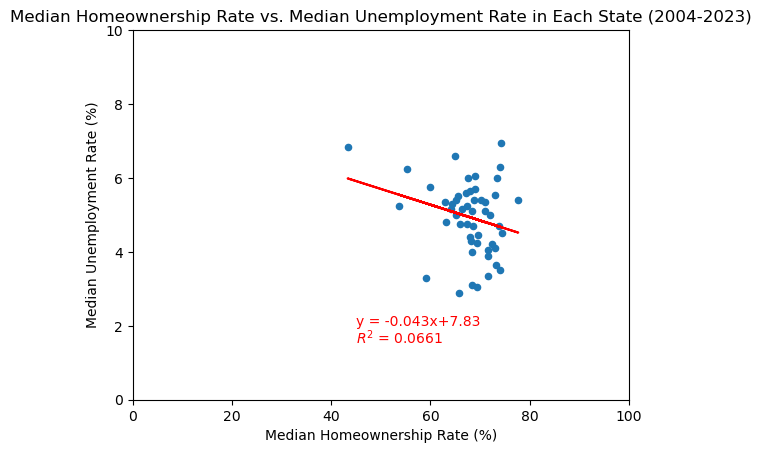

In [ ]:
# Plotting the relationship of median homeownersip rate and median unemployment rate
plot = data.plot(kind='scatter', x='Median Homeownership Rate', y='Median Unemployment Rate', 
                 xlabel='Median Homeownership Rate (%)', ylabel='Median Unemployment Rate (%)',
                 title='Median Homeownership Rate vs. Median Unemployment Rate in Each State (2004-2023)');

# Calculating the linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(data['Median Homeownership Rate'], data['Median Unemployment Rate'])
plot.plot(data['Median Homeownership Rate'], intercept + slope * data['Median Homeownership Rate'], 'r', label='Fitted line');
plot.annotate(text=f'y = {round(slope, 3)}x+{round(intercept, 2)}', xy=(45, 2), color='red');
plot.annotate(text=f'$R^2$ = {round(r_value**2, 4)}', xy=(45, 1.5), color='red');

plot.set_xlim(0, 100)
plot.set_ylim(0, 10)

# Saving the image
figure = plot.get_figure()
figure.savefig('Visualizations/Linear_Regression_Median_Homeownership_Rate_vs_Median_Unemployment_Rate.png')

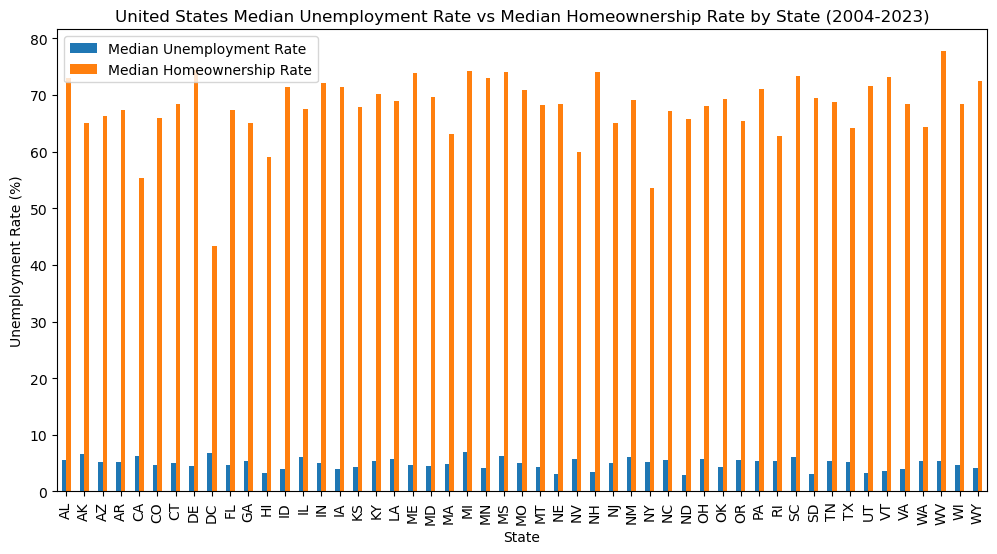

In [54]:
# Graphing the relationship of median homeownersip rate and median unemployment rate
graph = data.plot(kind='bar', title='United States Median Unemployment Rate vs Median Homeownership Rate by State (2004-2023)', 
                  x='State', xlabel='State', ylabel='Unemployment Rate (%)',
                  figsize=(12, 6));
figure2 = plot.get_figure()
figure2.savefig('Visualizations/Bar_Plot_Median_Homeownership_Rate_vs_Median_Unemployment_Rate.png')